In [1]:
#Standard imports

import pandas as pd
import numpy as np

In [2]:
#Imports for webscraping

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select, WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager

import time as t
import os

import requests
from bs4 import BeautifulSoup

In [3]:
#NLP tokens for processing

import unicodedata
import re
import json
import nltk

import spacy

from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [4]:
#Sentiment Analysis

import nltk.sentiment

In [5]:
#Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
players = ['Patrick Mahomes',
'Justin Herbert',
'Tom Brady',
'Kirk Cousins',
'Joe Burrow',
'Jared Goff',
'Josh Allen',
'Geno Smith',
'Trevor Lawrence',
'Jalen Hurts',
'Aaron Rodgers',
'Tua Tagovailoa',
'Russell Wilson',
'Derek Carr',
'Daniel Jones',
'Davis Mills',
'Matt Ryan',
'Mac Jones',
'Andy Dalton',
'Dak Prescott',
'Jacoby Brissett',
'Ryan Tannehill',
'Jimmy Garoppolo',
'Kenny Pickett',
'Kyler Murray',
'Lamar Jackson',
'Justin Fields',
'Marcus Mariota',
'Baker Mayfield',
'Matthew Stafford',
'Taylor Heinicke',
'Carson Wentz',
'Zach Wilson',
'Brock Purdy',
'Mitchell Trubisky',
'Mike White',
'Sam Darnold',
'Deshaun Watson',
'Cooper Rush',
'Joe Flacco',
'Tom Brady',
'Justin Herbert',
'Matthew Stafford',
'Patrick Mahomes',
'Derek Carr',
'Joe Burrow',
'Dak Prescott',
'Josh Allen',
'Kirk Cousins',
'Aaron Rodgers',
'Matt Ryan',
'Jimmy Garoppolo',
'Mac Jones',
'Kyler Murray',
'Ben Roethlisberger',
'Ryan Tannehill',
'Trevor Lawrence',
'Carson Wentz',
'Taylor Heinicke',
'Jared Goff',
'Jalen Hurts',
'Russell Wilson',
'Teddy Bridgewater',
'Baker Mayfield',
'Lamar Jackson',
'Davis Mills',
'Tua Tagovailoa',
'Sam Darnold',
'Daniel Jones',
'Zach Wilson',
'Justin Fields',
'Andy Dalton',
'Jacoby Brissett',
'Jameis Winston',
'Trevor Siemian',
'Tyler Huntley',
'Tyrod Taylor',
'Mike Glennon',
'Deshaun Watson',
'Patrick Mahomes',
'Tom Brady',
'Matt Ryan',
'Josh Allen',
'Justin Herbert',
'Aaron Rodgers',
'Kirk Cousins',
'Russell Wilson',
'Philip Rivers',
'Derek Carr',
'Matthew Stafford',
'Kyler Murray',
'Jared Goff',
'Ryan Tannehill',
'Ben Roethlisberger',
'Teddy Bridgewater',
'Baker Mayfield',
'Daniel Jones',
'Drew Brees',
'Drew Lock',
'Lamar Jackson',
'Joe Burrow',
'Cam Newton',
'Carson Wentz',
'Nick Mullens',
'Gardner Minshew',
'Sam Darnold',
'Andy Dalton',
'Ryan Fitzpatrick',
'Mitchell Trubisky',
'Dak Prescott',
'Nick Foles',
'Tua Tagovailoa',
'Alex Smith',
'Dwayne Haskins',
'Jimmy Garoppolo',
'Mike Glennon',
'Jalen Hurts',
'Brandon Allen',
'Joe Flacco',
'Jameis Winston',
'Dak Prescott',
'Jared Goff',
'Philip Rivers',
'Matt Ryan',
'Russell Wilson',
'Tom Brady',
'Derek Carr',
'Carson Wentz',
'Patrick Mahomes',
'Aaron Rodgers',
'Jimmy Garoppolo',
'Deshaun Watson',
'Baker Mayfield',
'Kyler Murray',
'Kirk Cousins',
'Ryan Fitzpatrick',
'Andy Dalton',
'Kyle Allen',
'Gardner Minshew',
'Mitchell Trubisky',
'Lamar Jackson',
'Josh Allen',
'Daniel Jones',
'Sam Darnold',
'Drew Brees',
'Jacoby Brissett',
'Ryan Tannehill',
'Matthew Stafford',
'Joe Flacco',
'Mason Rudolph',
'Case Keenum',
'Teddy Bridgewater',
'Dwayne Haskins',
'Marcus Mariota',
'Devlin Hodges',
'Eli Manning',
'Drew Lock',
'David Blough',
'Ben Roethlisberger',
'Patrick Mahomes',
'Matt Ryan',
'Jared Goff',
'Andrew Luck',
'Aaron Rodgers',
'Tom Brady',
'Philip Rivers',
'Eli Manning',
'Kirk Cousins',
'Deshaun Watson',
'Derek Carr',
'Drew Brees',
'Case Keenum',
'Dak Prescott',
'Matthew Stafford',
'Baker Mayfield',
'Russell Wilson',
'Cam Newton',
'Mitchell Trubisky',
'Carson Wentz',
'Jameis Winston',
'Sam Darnold',
'Blake Bortles',
'Andy Dalton',
'Marcus Mariota',
'Joe Flacco',
'Ryan Fitzpatrick',
'Josh Rosen',
'Nick Mullens',
'Alex Smith',
'Josh Allen',
'Ryan Tannehill',
'Nick Foles',
'C.J. Beathard',
'Brock Osweiler',
'Lamar Jackson',
'Jeff Driskel',
'Cody Kessler',
'Tom Brady',
'Philip Rivers',
'Matthew Stafford',
'Drew Brees',
'Ben Roethlisberger',
'Matt Ryan',
'Kirk Cousins',
'Alex Smith',
'Russell Wilson',
'Jared Goff',
'Blake Bortles',
'Case Keenum',
'Jameis Winston',
'Derek Carr',
'Eli Manning',
'Dak Prescott',
'Andy Dalton',
'Cam Newton',
'Carson Wentz',
'Marcus Mariota',
'Joe Flacco',
'Jacoby Brissett',
'Josh McCown',
'DeShone Kizer',
'Tyrod Taylor',
'Jay Cutler',
'Trevor Siemian',
'Mitchell Trubisky',
'Carson Palmer',
'Brett Hundley',
'Deshaun Watson',
'Aaron Rodgers',
'Jimmy Garoppolo',
'C.J. Beathard',
'Tom Savage',
'Brian Hoyer',
'Ryan Fitzpatrick',
'Brock Osweiler',
'Blaine Gabbert',
'Drew Stanton',
'Mike Glennon',
'Drew Brees',
'Matt Ryan',
'Kirk Cousins',
'Aaron Rodgers',
'Philip Rivers',
'Joe Flacco',
'Matthew Stafford',
'Andrew Luck',
'Carson Palmer',
'Russell Wilson',
'Andy Dalton',
'Jameis Winston',
'Eli Manning',
'Derek Carr',
'Blake Bortles',
'Sam Bradford',
'Ben Roethlisberger',
'Carson Wentz',
'Dak Prescott',
'Tom Brady',
'Cam Newton',
'Alex Smith',
'Marcus Mariota',
'Trevor Siemian',
'Tyrod Taylor',
'Ryan Tannehill',
'Brock Osweiler',
'Ryan Fitzpatrick',
'Colin Kaepernick',
'Case Keenum',
'Matt Barkley',
'Brian Hoyer',
'Cody Kessler',
'Josh McCown',
'Jared Goff',
'Jay Cutler',
'Blaine Gabbert',
'Robert Griffin III',
'Bryce Petty']


In [7]:
len(players)

277

In [8]:
len(set(players))

85

In [9]:
unique_players = set(players)

In [10]:
# driver = webdriver.Chrome(service = Service())

In [11]:
# unique_player = 'Lamar Jackson'
# player = f'"{unique_player}" performance' 

# #To get to the list of results

# driver.get("https://www.sportskeeda.com/find")
# driver.find_element(By.NAME, 'search').send_keys(player)
# driver.find_element(By.XPATH, '//button').click()
# t.sleep(2)

In [12]:
#Getting links for web results (i.e. NOT ad-sponsored links)

#driver.find_elements(By.XPATH, '//div[@class="gsc-results gsc-webResult"]') #All web results
# elements = driver.find_elements(By.XPATH, '//div[@class="gs-webResult gs-result"]/div/div/a')

In [13]:
def get_pigskin_nlp(players):
    players_df = pd.DataFrame({})
    driver = webdriver.Chrome(service = Service())
    for player in players:
        query = f'"{player}" performance' 
        
        driver.get("https://www.sportskeeda.com/find")
        driver.find_element(By.NAME, 'search').send_keys(query)
        driver.find_element(By.XPATH, '//button').click()
        t.sleep(2)
        
        elements = driver.find_elements(By.XPATH, '//div[@class="gs-webResult gs-result"]/div/div/a')
        
        bag_of_words = []

        for element in elements:
            if element.get_attribute('href') is not None:
                link = element.get_attribute('href')
                t.sleep(2)
                response = requests.get(link)
                soup = BeautifulSoup(response.content, 'html.parser')
                title = soup.title.string
                print(link)
                if soup.find('div', class_='keeda_widget') is not None:
                    content = soup.find('div', class_='keeda_widget').text.replace('\n', ' ')
                    
                    sep = 'Recommended Video'
                
                    content = content.split(sep, 1)[0]
                    
                    words = f'{title} {content}'
                    
                    bag_of_words.append(words)
                    
        player_info = pd.DataFrame({'player_name': [player],
                                   'player_commentary': [bag_of_words]})
        
        players_df = pd.concat([players_df, player_info], ignore_index=True)
    
    driver.quit()
    
    return players_df

In [14]:
# df = get_pigskin_nlp(set(players))

In [15]:
#df.to_csv('player_commentaries.csv')

In [16]:
df = pd.read_csv('player_commentaries.csv', index_col=0)

In [17]:
def clean_strings(string, exclude_words=[], extra_words=[]):    
    #Initialize NLP spacy object for lemmatization
    nlp = spacy.load('en_core_web_sm')
    
    #Basic clean
    lower_string = string.lower()
    
    normal_string = unicodedata.normalize('NFKD', lower_string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8', 'ignore')
    
    normal_no_chars_string = re.sub(r'[^a-z0-9\s]', '', normal_string.replace("'", " "))
    
    #Tokenize
    ttt = ToktokTokenizer()
    tokens = ttt.tokenize(normal_no_chars_string, return_str=True)
    
    doc = nlp(tokens)
    
    #Lemmatize
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    
    lemmatized_text
    
    #Remove stopwords
    stopword_list = stopwords.words('english')
    
    #Removing words from list
    stopword_list = [word for word in stopword_list if word not in exclude_words]
    
    #Adding words to list
    
    for word in extra_words:
        stopword_list.append(word)
    
    no_stop_words = [word for word in lemmatized_text.split() if word not in stopword_list]
    
    no_stop_string = ' '.join(no_stop_words)
    
    return no_stop_string

In [18]:
df['player_commentary'] = df['player_commentary'].apply(clean_strings)

In [19]:
df

,player_name,player_commentary
0,Blake Bortles,jaguar fare london explore jacksonville perfor...
1,Cody Kessler,good quarterback room nfl 2018 edition quarter...
2,Mike White,drill fan react mike white give shoutout survi...
3,Gardner Minshew,3 big talking point trevor lawrence performanc...
4,Joe Flacco,joe flacco still play football joe flacco one ...
...,...,...
80,Kenny Pickett,kenny pickett performance prove steeler potent...
81,Cam Newton,nfl analyst blast cam newton performance ne 20...
82,Devlin Hodges,
83,Davis Mills,texans eye 2023 nfl draft davis mill strange t...


In [20]:
cap = pd.read_csv('final_df.csv')

In [21]:
cap[['name', 'year', 'percent_of_cap']]

,name,year,percent_of_cap
0,Aaron Rodgers,2016,17.9
1,Aaron Rodgers,2017,17.9
2,Aaron Rodgers,2018,18.9
3,Aaron Rodgers,2019,18.9
4,Aaron Rodgers,2020,18.9
...,...,...,...
279,Tyrod Taylor,2016,11.6
280,Tyrod Taylor,2017,9.1
281,Tyrod Taylor,2021,3.0
282,Zach Wilson,2021,4.8


<AxesSubplot:xlabel='percent_of_cap', ylabel='Count'>

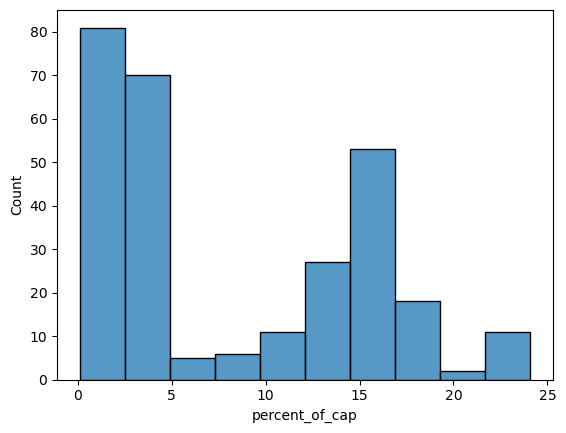

In [22]:
sns.histplot(cap['percent_of_cap'])

<AxesSubplot:xlabel='percent_of_cap'>

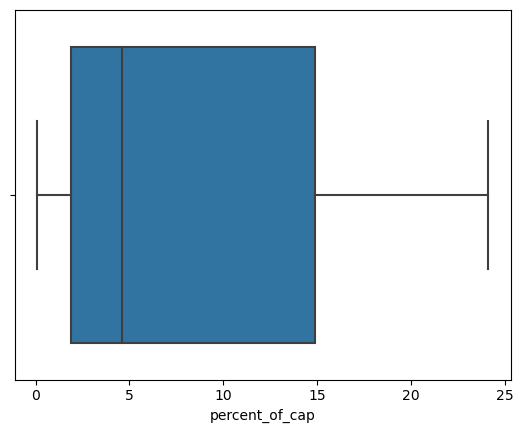

In [23]:
sns.boxplot(data=cap, x='percent_of_cap')

In [24]:
cap = cap[['name', 'year', 'percent_of_cap']].sort_values(by=['name', 'year']).drop_duplicates('name', keep='last')

In [25]:
cap = cap.merge(df, left_on='name', right_on='player_name')

In [26]:
cap

,name,year,percent_of_cap,player_name,player_commentary
0,Aaron Rodgers,2022,24.1,Aaron Rodgers,rank aaron rodger top 5 playoff performance aa...
1,Alex Smith,2020,13.3,Alex Smith,nfl 5 takeaway washington week 14 win 49er not...
2,Andrew Luck,2018,15.8,Andrew Luck,fan react andrew luck appearance bulldog vs al...
3,Andy Dalton,2022,1.4,Andy Dalton,team andy dalton play nfl journey saint vetera...
4,Baker Mayfield,2022,7.4,Baker Mayfield,nfl fan react yet another interceptionladen pe...
...,...,...,...,...,...
80,Trevor Siemian,2021,0.5,Trevor Siemian,trevor siemian nfl star electrifying performan...
81,Tua Tagovailoa,2022,3.8,Tua Tagovailoa,tua tagovailoa suffer concussion vs packer fan...
82,Tyler Huntley,2021,0.4,Tyler Huntley,tyler huntley prove valuable backup within bal...
83,Tyrod Taylor,2021,3.0,Tyrod Taylor,bill vs texans prediction odd pick october 3 n...


In [27]:
conditions = [
    (cap['percent_of_cap'] < 3.5),
    (cap['percent_of_cap'] >= 3.5) & (cap['percent_of_cap'] < 13.5),
    (cap['percent_of_cap'] >= 13.5)
    ]

# create a list of the values we want to assign for each condition
values = ['low', 'mid', 'high']

# create a new column and use np.select to assign values to it using our lists as arguments
cap['tier'] = np.select(conditions, values)

# display updated DataFrame
cap.head()

,name,year,percent_of_cap,player_name,player_commentary,tier
0,Aaron Rodgers,2022,24.1,Aaron Rodgers,rank aaron rodger top 5 playoff performance aa...,high
1,Alex Smith,2020,13.3,Alex Smith,nfl 5 takeaway washington week 14 win 49er not...,mid
2,Andrew Luck,2018,15.8,Andrew Luck,fan react andrew luck appearance bulldog vs al...,high
3,Andy Dalton,2022,1.4,Andy Dalton,team andy dalton play nfl journey saint vetera...,low
4,Baker Mayfield,2022,7.4,Baker Mayfield,nfl fan react yet another interceptionladen pe...,mid


In [28]:
cap.drop(columns='name')[['player_name', 'year', 'player_commentary', 'percent_of_cap', 'tier']].to_csv('commentary_cap.csv')

In [62]:
high_words = ' '.join(cap[cap.tier == 'high'].player_commentary)
mid_words = ' '.join(cap[cap.tier == 'mid'].player_commentary)
low_words = ' '.join(cap[cap.tier == 'low'].player_commentary)

unigram_high_words = high_words
unigram_mid_words = mid_words
unigram_low_words = low_words

bi_tri_high_words = high_words
bi_tri_mid_words = mid_words
bi_tri_low_words = low_words

In [63]:
unigram_stopwords = [' game',
                    ' nfl',
                    ' season',
                    ' super',
                    ' bowl',
                    ' quarterback',
                    ' play',
                    ' team',
                    ' I',
                    ' performance',
                    ' year',
                    ' week']

In [64]:
for word in unigram_stopwords:
    unigram_high_words = unigram_high_words.replace(word, '')

    unigram_mid_words = unigram_mid_words.replace(word, '')

    unigram_low_words = unigram_low_words.replace(word, '')

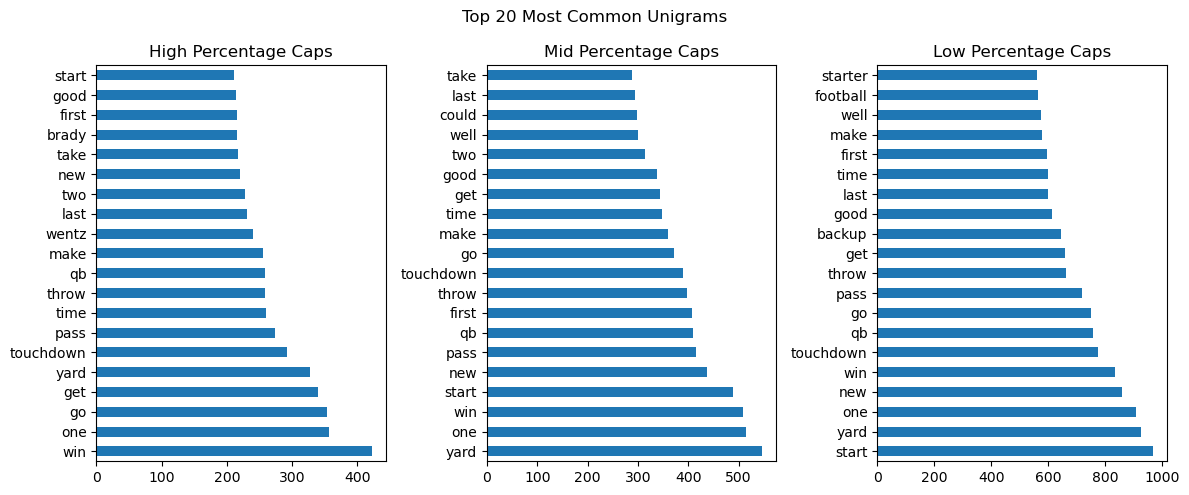

In [93]:
plt.figure(figsize=(12,5))
plt.suptitle('Top 20 Most Common Unigrams')

plt.subplot(131)
pd.Series(unigram_high_words.split()).value_counts().head(20).plot.barh()
plt.title('High Percentage Caps')

plt.subplot(132)
pd.Series(unigram_mid_words.split()).value_counts().head(20).plot.barh()
plt.title('Mid Percentage Caps')

plt.subplot(133)
pd.Series(unigram_low_words.split()).value_counts().head(20).plot.barh()
plt.title('Low Percentage Caps')

plt.tight_layout()
plt.show()

In [66]:
bi_tri_stopwords = [' I', ' blake',
 ' bortle',
 ' cody',
 ' kessler',
 ' mike',
 ' white',
 ' gardner',
 ' minshew',
 ' joe',
 ' flacco',
 ' philip',
 ' river',
 ' ryan',
 ' fitzpatrick',
 ' josh',
 ' rosen',
 ' drew',
 ' lock',
 ' deshaun',
 ' watson',
 ' ben',
 ' roethlisberger',
 ' sam',
 ' darnold',
 ' carson',
 ' palmer',
 ' matt',
 ' barkley',
 ' trevor',
 ' lawrence',
 ' taylor',
 ' heinicke',
 ' jalen',
 ' hurt',
 ' geno',
 ' smith',
 ' marcus',
 ' mariota',
 ' ryan',
 ' tannehill',
 ' patrick',
 ' mahome',
 ' tua',
 ' tagovailoa',
 ' justin',
 ' field',
 ' nick',
 ' mullen',
 ' baker',
 ' mayfield',
 ' david',
 ' blough',
 ' alex',
 ' smith',
 ' brock',
 ' purdy',
 ' daniel',
 ' jones',
 ' jared',
 ' goff',
 ' kirk',
 ' cousin',
 ' tyler',
 ' huntley',
 ' andrew',
 ' luck',
 ' jay',
 ' cutler',
 ' dwayne',
 ' haskin',
 ' aaron',
 ' rodger',
 ' russell',
 ' wilson',
 ' carson',
 ' wentz',
 ' matt',
 ' ryan',
 ' brock',
 ' osweiler',
 ' josh',
 ' mccown',
 ' colin',
 ' kaepernick',
 ' tyrod',
 ' taylor',
 ' cooper',
 ' rush',
 ' mac',
 ' jones',
 ' joe',
 ' burrow',
 ' drew',
 ' stanton',
 ' eli',
 ' manning',
 ' kyle',
 ' allen',
 ' josh',
 ' allen',
 ' dak',
 ' prescott',
 ' matthew',
 ' stafford',
 ' mitchell',
 ' trubisky',
 ' andy',
 ' dalton',
 ' brett',
 ' hundley',
 ' nick',
 ' fole',
 ' tom',
 ' brady',
 ' c.j.',
 ' beathard',
 ' sam',
 ' bradford',
 ' robert',
 ' griffin',
 ' iii',
 ' blaine',
 ' gabbert',
 ' mason',
 ' rudolph',
 ' justin',
 ' herbert',
 ' jamei',
 ' winston',
 ' jimmy',
 ' garoppolo',
 ' brian',
 ' hoyer',
 ' kyler',
 ' murray',
 ' brandon',
 ' allen',
 ' case',
 ' keenum',
 ' jacoby',
 ' brissett',
 ' bryce',
 ' petty',
 ' trevor',
 ' siemian',
 ' jeff',
 ' driskel',
 ' drew',
 ' bree',
 ' tom',
 ' savage',
 ' mike',
 ' glennon',
 ' deshone',
 ' kizer',
 ' teddy',
 ' bridgewater',
 ' zach',
 ' wilson',
 ' derek',
 ' carr',
 ' kenny',
 ' pickett',
 ' cam',
 ' newton',
 ' devlin',
 ' hodge',
 ' davis',
 ' mill',
 ' lamar',
 ' jackson',
 ' poll 0 vote quick link',
 ' follow share show comment',
 ' feedback thank first one comment',
 ' view post instagram',
 ' instagram instagram post',
 ' quote please credit',
 ' w w w',
 ' new england patriot',
 ' new orleans saint', 
 ' new york jet',
 ' kansas city chief',
 ' green bay packer',
 ' san francisco 49er',
 ' tampa bay buccaneer',
 ' los angeles ram',
 ' las vegas raider',
 ' new orleans saints',
 ' new york giants',
 ' new york jets',
 ' los angeles charger',
 ' washington football team',
 ' los angeles rams',
 ' san francisco 49ers',
 ' kansas city chiefs',
 ' carolina panther',
 ' denver broncos',
 ' pittsburgh steeler',
 ' chicago bear',
 ' philadelphia eagle',
 ' buffalo bill',
 ' houston texans',
 ' indianapolis colt',
 ' cleveland brown',
 ' 2023 arnold classic',
 ' mr olympia',
 ' miami dolphin',
 ' jacksonville jaguar',
 ' let take look',
 ' san diego charger',
 ' today2835 80420 yards12 ypa6 tdabsolute masterclass team',
 ' need 10ajmccarron post one great spring football',
 ' dallas cowboy',
 ' seattle seahawks',
 ' baltimore raven',
 ' washington commander',
 ' tennessee titans',
 ' detroit lion',
 ' arizona cardinal',
 ' lebron james',
 ' golden state warrior',
 ' new york giant',
 ' prime videoalso available',
 ' nfl nfl november 18 2022',
 ' gmt18 nov 2022',
 ' yard one touchdown',
 ' yard two touchdown',
 ' yard three touchdown',
 ' yard four touchdown',
 ' mccarron statline time performance',
 ' l l l']

In [67]:
for word in bi_tri_stopwords:
    bi_tri_high_words = bi_tri_high_words.replace(word, '')
    bi_tri_mid_words = bi_tri_mid_words.replace(word, '')
    bi_tri_low_words = bi_tri_low_words.replace(word, '')

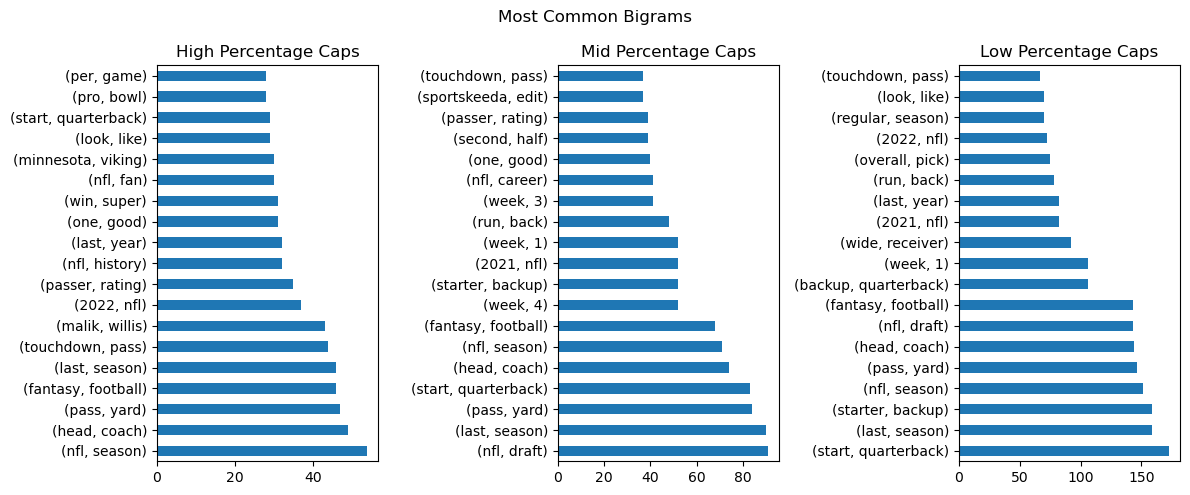

In [94]:
plt.figure(figsize=(12,5))
plt.suptitle('Most Common Bigrams')

plt.subplot(131)
top_20_bigrams_high = (pd.Series(nltk.ngrams(bi_tri_high_words.split(), 2))
                      .value_counts()
                      .head(20))
top_20_bigrams_high[1:20].plot.barh()
plt.title('High Percentage Caps')

plt.subplot(132)
top_20_bigrams_mid = (pd.Series(nltk.ngrams(bi_tri_mid_words.split(), 2))
                      .value_counts()
                      .head(20))
top_20_bigrams_mid[1:20].plot.barh()
plt.title('Mid Percentage Caps')

plt.subplot(133)
top_20_bigrams_low = (pd.Series(nltk.ngrams(bi_tri_low_words.split(), 2))
                      .value_counts()
                      .head(20))
top_20_bigrams_low[1:20].plot.barh()
plt.title('Low Percentage Caps')

plt.tight_layout()
plt.show()

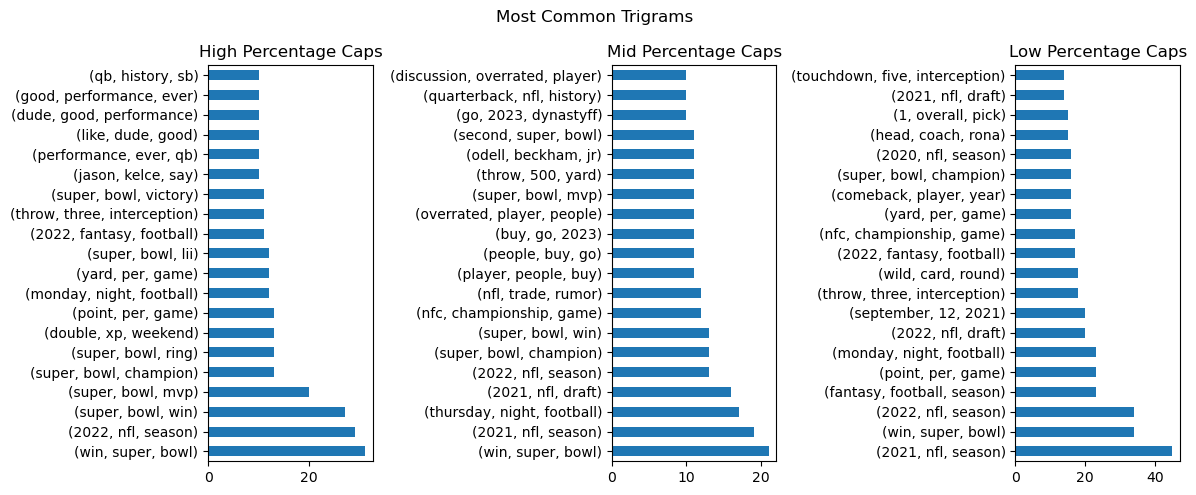

In [95]:
plt.figure(figsize=(12,5))
plt.suptitle('Most Common Trigrams')

plt.subplot(131)
top_20_trigrams_high = (pd.Series(nltk.ngrams(bi_tri_high_words.split(), 3))
                      .value_counts()
                      .head(20))
top_20_trigrams_high.plot.barh()
plt.title('High Percentage Caps')

plt.subplot(132)
top_20_trigrams_mid = (pd.Series(nltk.ngrams(bi_tri_mid_words.split(), 3))
                      .value_counts()
                      .head(20))
top_20_trigrams_mid.plot.barh()
plt.title('Mid Percentage Caps')

plt.subplot(133)
top_20_trigrams_low = (pd.Series(nltk.ngrams(bi_tri_low_words.split(), 3))
                      .value_counts()
                      .head(20))
top_20_trigrams_low.plot.barh()
plt.title('Low Percentage Caps')

plt.tight_layout()
plt.show()

# Sentiment Analysis

In [71]:
#Initialize Sentiment Analyzer

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [72]:
#Analyze sentiment based on raw, pre-processed commentary

cap['sentiment'] = df['player_commentary'].apply(lambda doc: sia.polarity_scores(doc)['compound'])

In [96]:
cap.to_csv('sentiment_scores.csv')

In [74]:
#Checking to see difference among tiers

cap.groupby('tier').mean('sentiment')

,year,percent_of_cap,sentiment
tier,,,
high,2021.333333,18.744444,0.999606
low,2019.978261,1.219565,0.956213
mid,2019.857143,7.233333,0.999700


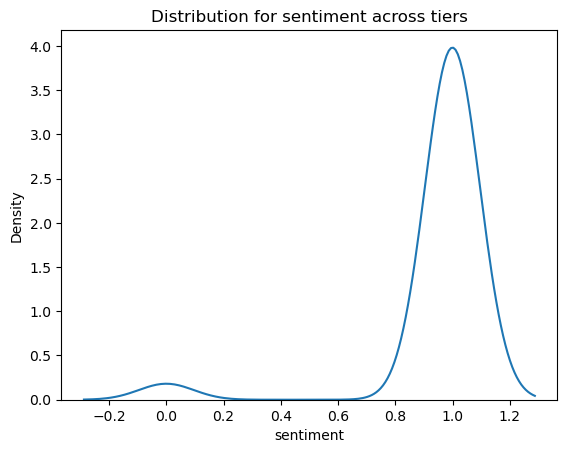

In [118]:
# is the distribution for sentiment different for different tiers

#sns.kdeplot(cap[cap.tier=='high'].sentiment, label='high')
#sns.kdeplot(cap[cap.tier=='mid'].sentiment, label='mid')
sns.kdeplot(cap[cap.tier=='low'].sentiment, label='low')

#plt.legend(['high', 'mid', 'low'])
plt.title("Distribution for sentiment across tiers")
plt.show()

# Topic Modeling

In [75]:
import gensim

In [76]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [77]:
import spacy
from nltk.corpus import stopwords

In [78]:
import pyLDAvis
import pyLDAvis.gensim

In [79]:
import numpy as np

In [80]:
import warnings

In [81]:
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [106]:
def topic_modeling(commentary):
    for word in unigram_stopwords:
        commentary = commentary.replace(word, '')
    for word in bi_tri_stopwords:
        commentary = commentary.replace(word, '')
    return commentary

In [108]:
texts = cap.player_commentary.apply(topic_modeling)

In [109]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(texts)

print(data_words[0][0:20])

['rank', 'top', 'off', 'one', 'great', 'history', 'good', 'ratio', 'time', 'second', 'mvp', 'award', 'ever', 'champion', 'consistently', 'put', 'show', 'one', 'good', 'many']


In [110]:
id2word = corpora.Dictionary(data_words)

corpus = []

for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)
    
print(corpus[0][0:20])

[(0, 2), (1, 6), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 6), (9, 3), (10, 6), (11, 1), (12, 1), (13, 1), (14, 2), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1)]


In [113]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word = id2word,
                                           num_topics = 3,
                                           random_state = 100,
                                           update_every = 1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto')

In [114]:
#Visualization

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model,
                              corpus,
                              id2word,
                              mds="mmds",
                              R=30)

vis

/usr/local/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.006407  0.044390       1        1  59.019489
0      0.047285 -0.007057       2        1  26.375763
1     -0.040877 -0.037332       3        1  14.604749, topic_info=        Term         Freq        Total Category  logprob  loglift
918     yard  1582.000000  1582.000000  Default  30.0000  30.0000
903      win  1622.000000  1622.000000  Default  29.0000  29.0000
292  fantasy   422.000000   422.000000  Default  28.0000  28.0000
583     pass  1292.000000  1292.000000  Default  27.0000  27.0000
341      get  1233.000000  1233.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
291      fan    98.972236   684.700276   Topic3  -5.7393  -0.0103
896     well   107.638420   965.007472   Topic3  -5.6554  -0.2695
752    start   121.442338  1542.086760   Topic3  -5.5347  -0.6176
66      back   100.467278   794.174848   Topic3  -5.7244  -0.1436
172    could    98.362700   929.260936   Topic3  -5.7455  -0.3219

[266 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
5574       1  0.982107  accountability
30         1  0.581403            also
30         2  0.266364            also
30         3  0.151435            also
8103       1  0.218191           anais
...      ...       ...             ...
919        1  0.919328           yards
919        2  0.077690           yards
919        3  0.012948           yards
13311      2  0.958610       youngslay
11729      2  0.939752          zimmer

[370 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])